In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
table = pd.read_csv('/Users/zhangchen/Documents/mygithub/WomenInPython-master/ML_Ecommerce/EcommerceCustomers.csv')
table.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
table.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


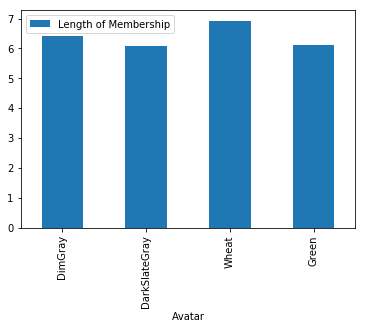

In [18]:
table.loc[table['Length of Membership']>6].plot.bar(x='Avatar', y='Length of Membership')

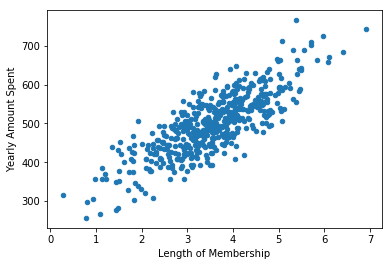

In [20]:
table.plot.scatter(x='Length of Membership', y='Yearly Amount Spent')

In [22]:
x = table[['Time on App', 'Time on Website', 'Length of Membership']]
y = table[['Yearly Amount Spent']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)
x_test.head()

,Time on App,Time on Website,Length of Membership
18,14.715388,38.244115,1.516576
361,10.347877,39.045156,3.434560
104,10.994224,38.074452,3.428860
4,12.795189,37.536653,4.446308
156,12.443048,37.327848,5.084861


In [26]:
md = LinearRegression()

In [27]:
md.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
print(md.coef_)
coe_table = pd.DataFrame(md.coef_.transpose(), index=x.columns, columns=['coefficients'])
coe_table

[[36.74667786  1.07348102 62.10453279]]


,coefficients
Time on App,36.746678
Time on Website,1.073481
Length of Membership,62.104533


In [32]:
prediction = md.predict(x_test)
prediction.shape #0.3*500

(150, 1)

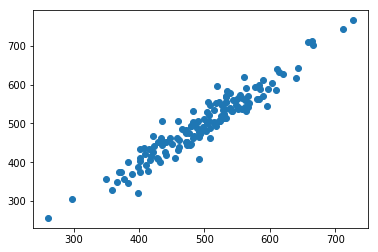

In [36]:
plt.scatter(prediction, y_test)

In [55]:
new_pred=md.predict(np.array([[13,40,6]]))
new_pred

array([[690.00736005]])

In [63]:
myint = pd.DataFrame([7,71])
myint.astype(float)

,0
0,7.0
1,71.0
